<a href="https://colab.research.google.com/github/MazedaZ/Covid-19-Prediction/blob/main/Covid_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
SOURCE_FILES = os.path.join('workspace', 'data')

In [ ]:
!rm -r workspace

In [ ]:
os.chdir('/content')
print(os.path)


<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


In [ ]:
if not os.path.exists(SOURCE_FILES):
    !mkdir -p {SOURCE_FILES}
    !mkdir -p {CHECKPOINT_PATH}
    # wget is a library to retrieve files through HTTP from the internet.
    !wget -O src.rar https://www.dropbox.com/s/l42hl14hzj87lx0/COVID-19-BD-Dataset.rar?dl=0#:~:text=Sign%20up-,Direct,-download
    !mv src.rar {SOURCE_FILES}
    %cd {SOURCE_FILES}
    !unrar x src.rar
    !rm src.rar

In [ ]:
!pwd

/content


# **Data Handeling**

In [ ]:
dataSet =  pd.read_csv('/content/workspace/data/COVID-19-BD-Dataset.csv')

In [ ]:
def trans_lockDown(x):
  if x == 'Yes':
    return 1
  if x == 'No':
    return 0


In [ ]:
dataSet['Trans_Lockdown'] = dataSet['Lockdown'].apply(trans_lockDown)

In [ ]:
dataSet

,Date,Daily new confirmed cases,Lockdown,Daily new deaths,Vaccinated Dose 1,vaccinated Dose 2,Recovered,Daily New Tests,Trans_Lockdown
0,12/31/2020,1014,No,28,0,0,1200,13135,0
1,1/1/2021,990,No,17,0,0,1200,12908,0
2,1/2/2021,684,No,23,0,0,1200,12877,0
3,1/3/2021,835,No,27,0,0,2860,12631,0
4,1/4/2021,910,No,24,0,0,944,12389,0
...,...,...,...,...,...,...,...,...,...
361,12/27/2021,373,No,1,73563574,51474890,6109,17752,0
362,12/28/2021,397,No,1,73986361,52096411,6124,17471,0
363,12/29/2021,495,No,1,74409148,52717932,6140,17776,0
364,12/30/2021,509,No,7,74831934,53339452,6155,18211,0


In [ ]:
dataSet.describe()

,Daily new confirmed cases,Daily new deaths,Vaccinated Dose 1,vaccinated Dose 2,Recovered,Daily New Tests,Trans_Lockdown
count,366.000000,366.000000,3.660000e+02,3.660000e+02,366.000000,366.000000,366.000000
mean,2931.811475,22.131148,1.867502e+07,1.084151e+07,3300.576503,22521.286885,0.161202
std,3713.943779,22.391394,2.158770e+07,1.415431e+07,2520.257690,8338.203361,0.368221
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,10046.000000,0.000000
25%,400.250000,8.000000,5.380996e+06,0.000000e+00,963.750000,16569.750000,0.000000
50%,1278.500000,15.000000,5.823245e+06,4.279770e+06,3711.000000,19426.500000,0.000000
75%,3901.750000,28.000000,3.239208e+07,1.696677e+07,5016.500000,26763.750000,0.000000
max,16230.000000,112.000000,7.525472e+07,5.396097e+07,19700.000000,45745.000000,1.000000


In [ ]:
feature = ['Daily New Tests','Daily new confirmed cases','Vaccinated Dose 1','vaccinated Dose 2','Recovered','Trans_Lockdown']
target = ['Daily new deaths']

In [ ]:
df_x = pd.DataFrame(dataSet,columns=feature)
df_y = pd.DataFrame(dataSet,columns=target)

In [ ]:
df_x

,Daily New Tests,Daily new confirmed cases,Vaccinated Dose 1,vaccinated Dose 2,Recovered,Trans_Lockdown
0,13135,1014,0,0,1200,0
1,12908,990,0,0,1200,0
2,12877,684,0,0,1200,0
3,12631,835,0,0,2860,0
4,12389,910,0,0,944,0
...,...,...,...,...,...,...
361,17752,373,73563574,51474890,6109,0
362,17471,397,73986361,52096411,6124,0
363,17776,495,74409148,52717932,6140,0
364,18211,509,74831934,53339452,6155,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

# **Linear Regression**

In [ ]:
reg_linear = linear_model.LinearRegression()

In [ ]:
reg_linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict =reg_linear.predict(x_test)
y_predict=abs(y_predict)

In [ ]:
o=y_test['Daily new deaths']

In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, y_predict)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, y_predict)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, y_predict,squared=False)
#R-squared:
Rsquare=r2_score(y_test, y_predict)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))



Mean Absolute Error(MAE): 8.809986448547233
Mean Square Error(MSE): 185.53982732901187
Root Mean Squared Error (RMSE): 13.621300500650145
R-squared: 0.4852364533689528


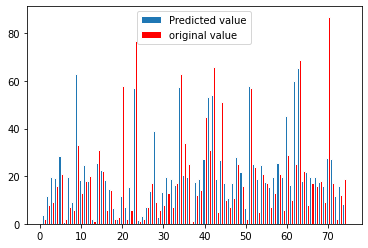

In [ ]:
#Grapg Plot
x = []
for val in y_predict:
   x.append(val[0])
items= list(range(1, len(x)+1))
plt.bar(items,x,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

# **Random Forest Regressor**

In [ ]:
regr = RandomForestRegressor(max_depth=6, random_state=0)
regr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
y_regr_predict = regr.predict(x_test)

In [ ]:
y_regr_predict

In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, y_regr_predict)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, y_regr_predict)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, y_regr_predict,squared=False)
#R-squared:
Rsquare=r2_score(y_test, y_regr_predict)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))


Mean Absolute Error(MAE): 3.7745558990889125
Mean Square Error(MSE): 57.49563819468397
Root Mean Squared Error (RMSE): 7.582587829671607
R-squared: 0.8404835282053582


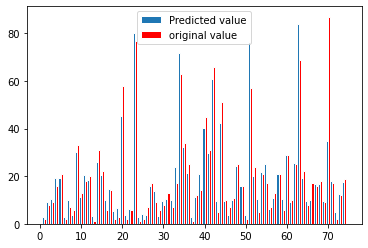

In [ ]:
#Grapg Plot
x_rfr = []
for val in y_regr_predict:
   x_rfr.append(val)
items= list(range(1, len(x_rfr)+1))
plt.bar(items,x_rfr,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

# Polynomial Linear Regression

In [ ]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x_train)
poly.fit(x_train,y_train)


model = linear_model.LinearRegression()
model.fit(x_poly,y_train)

pred_poly = model.predict(poly.fit_transform(x_test))

In [ ]:
pred_poly

In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, pred_poly)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, pred_poly)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, pred_poly,squared=False)
#R-squared:
Rsquare=r2_score(y_test, pred_poly)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))

Mean Absolute Error(MAE): 8.023383727437926
Mean Square Error(MSE): 117.9469627377067
Root Mean Squared Error (RMSE): 10.860338978950274
R-squared: 0.6727667707399649


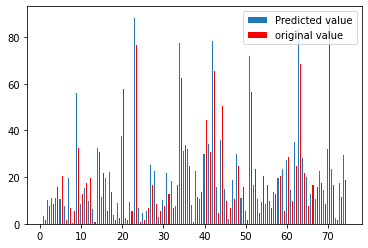

In [ ]:
#Grapg Plot
x = []
for val in pred_poly:
   x.append(val[0])
items= list(range(1, len(x)+1))
plt.bar(items,x,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

# Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit (x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
lgr_pred = clf.predict(x_test)

In [ ]:
lgr_pred

array([ 3,  3, 18, 30, 18,  1, 18,  1,  1, 30,  7, 30,  1,  1, 30, 18,  1,
        1,  3, 18,  3,  7, 18,  1,  1,  3,  1,  7,  3,  1, 18, 18, 30, 18,
       18, 18,  1, 18, 30, 18,  1, 18, 18,  1,  1,  1, 18,  1, 30,  3, 14,
        7, 18, 18, 30,  7, 18,  7, 18,  1,  3, 18, 18, 18, 18, 14, 30,  1,
        1, 14, 18,  1,  1,  1])

In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, lgr_pred)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, lgr_pred)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, lgr_pred,squared=False)
#R-squared:
Rsquare=r2_score(y_test, lgr_pred)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))

Mean Absolute Error(MAE): 14.027027027027026
Mean Square Error(MSE): 431.7567567567568
Root Mean Squared Error (RMSE): 20.77875734390189
R-squared: -0.19787025022887894


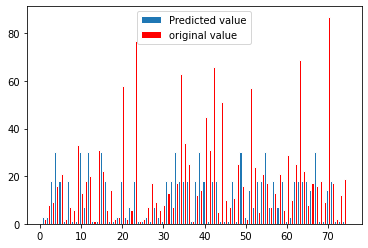

In [ ]:
#Grapg Plot
x = []
for val in lgr_pred:
   x.append(val)
items= list(range(1, len(x)+1))
plt.bar(items,x,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

#Ridge Regression

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)

y_rr_predict = rr.predict(x_test)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.0389e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, y_rr_predict)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, y_rr_predict)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, y_rr_predict,squared=False)
#R-squared:
Rsquare=r2_score(y_test, y_rr_predict)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))

Mean Absolute Error(MAE): 8.94521169001169
Mean Square Error(MSE): 186.72071694664766
Root Mean Squared Error (RMSE): 13.664578915819092
R-squared: 0.48196018144122255


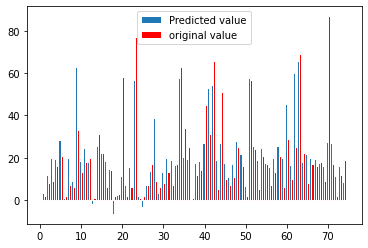

In [ ]:
#Grapg Plot
x_rr = []
for val in y_rr_predict:
   x_rr.append(val[0])
items= list(range(1, len(x_rr)+1))
plt.bar(items,x_rr,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

# Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(x_train,y_train)

y_ls_predict = lasso.predict(x_test)


In [ ]:
#Mean Absolute Error(MAE):
MAE=mean_absolute_error(y_test, y_ls_predict)
#Mean Square Error(MSE):
MSE=mean_squared_error(y_test, y_ls_predict)
#Root Mean Squared Error (RMSE):
RMSE=mean_squared_error(y_test, y_ls_predict,squared=False)
#R-squared:
Rsquare=r2_score(y_test, y_ls_predict)

print('Mean Absolute Error(MAE): '+str(MAE))
print('Mean Square Error(MSE): '+str(MSE))
print('Root Mean Squared Error (RMSE): '+str(RMSE))
print('R-squared: '+str(Rsquare))

Mean Absolute Error(MAE): 9.393490525526534
Mean Square Error(MSE): 183.94030078398512
Root Mean Squared Error (RMSE): 13.562459245431306
R-squared: 0.48967419576152504


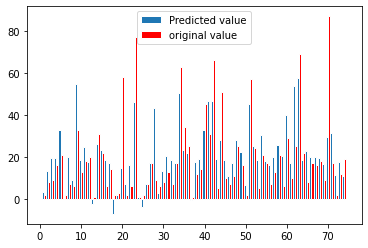

In [ ]:
#Grapg Plot
x_ls = []
for val in y_ls_predict:
   x_ls.append(val)
items= list(range(1, len(x_ls)+1))
plt.bar(items,x_ls,width=-0.5,align='edge',edgecolor='white',label='Predicted value')
plt.bar(items,o,width=0.5,align='edge',color='red',edgecolor='white',label='original value')
plt.legend()
plt.show()

In [ ]:
y_ls_predict

array([ 3.44132559, 13.24839234, 19.55499143, 19.56592437, 32.82663549,
        0.11503141, 19.9581165 ,  8.98696272, 54.58028742, 18.45708715,
       24.84864479, 17.54301604, -2.57801855, 25.99166055, 23.47038427,
       18.40473735, 17.08971469, -7.16890751,  1.73172701, 14.86425679,
        7.18196873, 15.95558868, 46.23906336,  0.93239451, -3.86411097,
        7.06064522, 17.20479928, 43.14970673,  2.78812049, 13.31123374,
       20.18804567, 18.72839884, 17.08669348, 50.50142934, 23.0634503 ,
       22.05878694, -0.63864299, 17.6769753 , 19.05760541, 32.58798645,
       46.61980822, 46.74040472, 18.88328306, 27.9494226 , 18.56569918,
       10.71402157, 16.87239815, 28.05145227, 22.54758297,  6.42061402,
       44.98707584, 25.30414143, 18.710696  , 30.32080469, 18.1974487 ,
       15.9413148 , 19.74532144, 25.76990147, 20.3358968 , 40.18678634,
       17.22404547, 53.9416667 , 57.55999721, 18.56087631, 22.75210566,
       20.08887782, 19.83448488, 19.70078451, 16.72258132, 29.70